In [1]:
library(readxl)
library(IRdisplay)
library(magrittr)
library(tidyverse)
library(scales)
library(gridExtra)
#library(forecast)
library(ggthemes)
theme_set(theme_economist())

source("sim_random_walk_function.R")
source("compare_models_function.R")
source("sim_stationary_example_function.R")

print("Loading is completed")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




[1] "Loading is completed"


## Time Series Data Overview

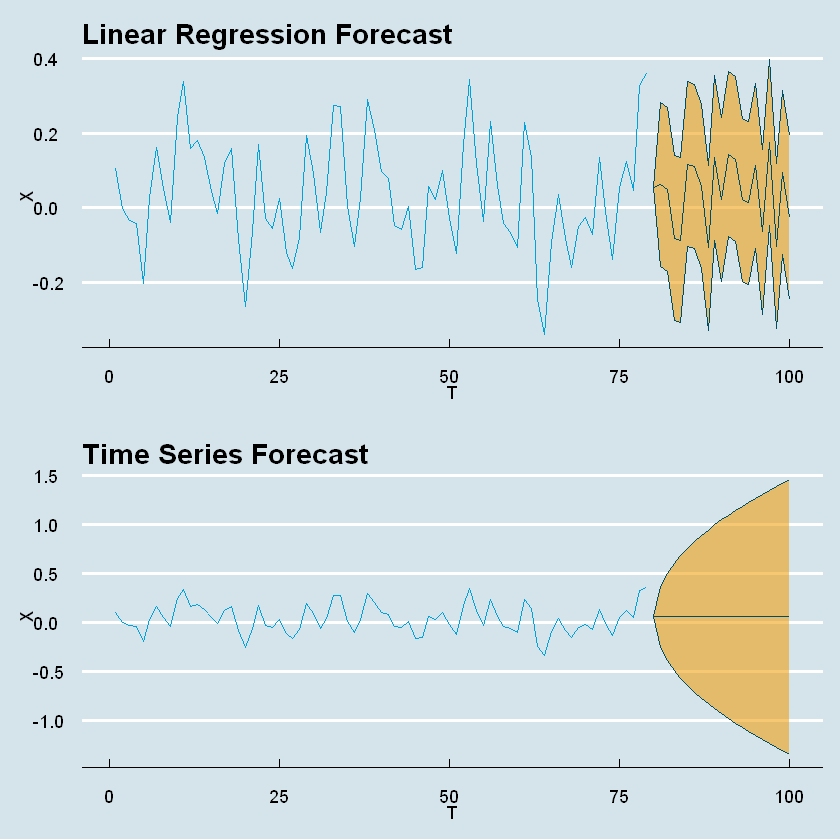

In [2]:
compare.models(n=100)

### Simulate Random Walk

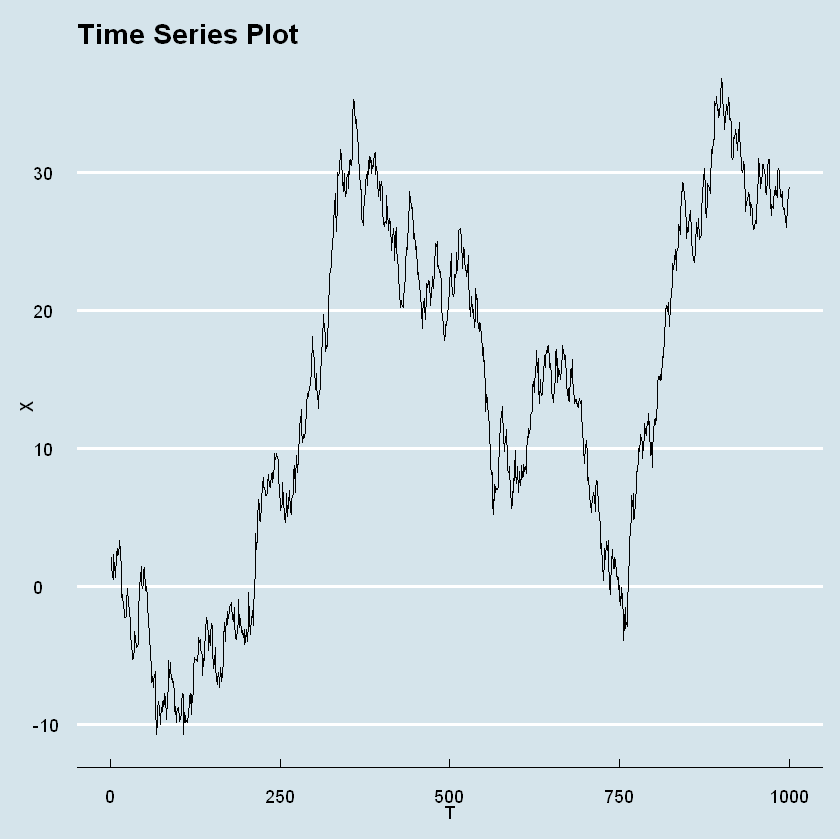

In [3]:
dat <- sim.random.walk()

dat %>% ggplot(aes(t, X)) + geom_line() + xlab("T") + ylab("X") + ggtitle("Time Series Plot")

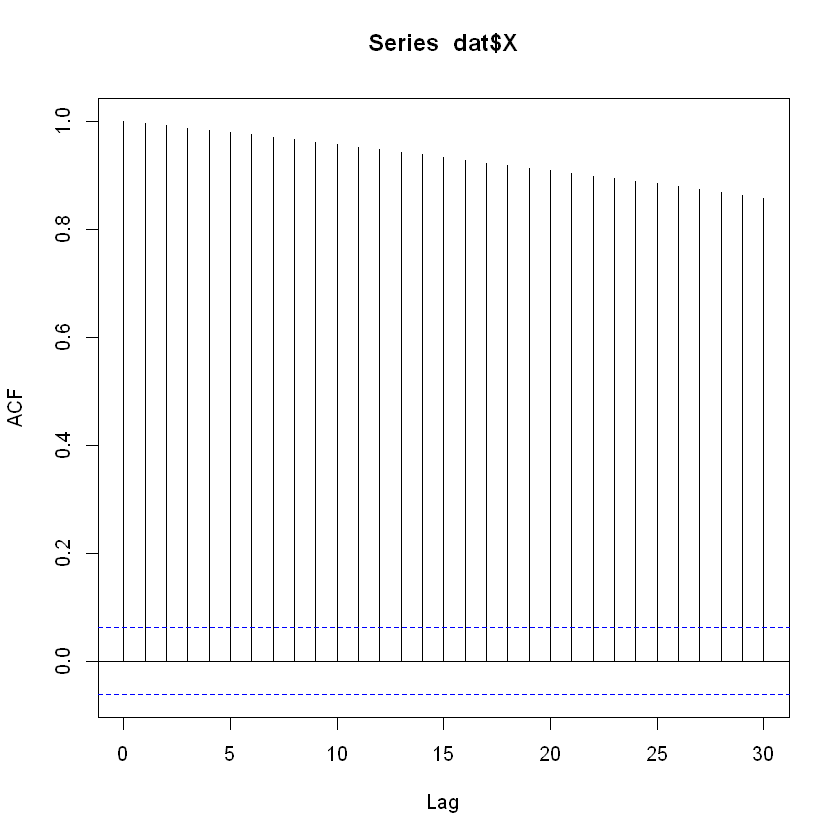

In [4]:
acf(dat$X)

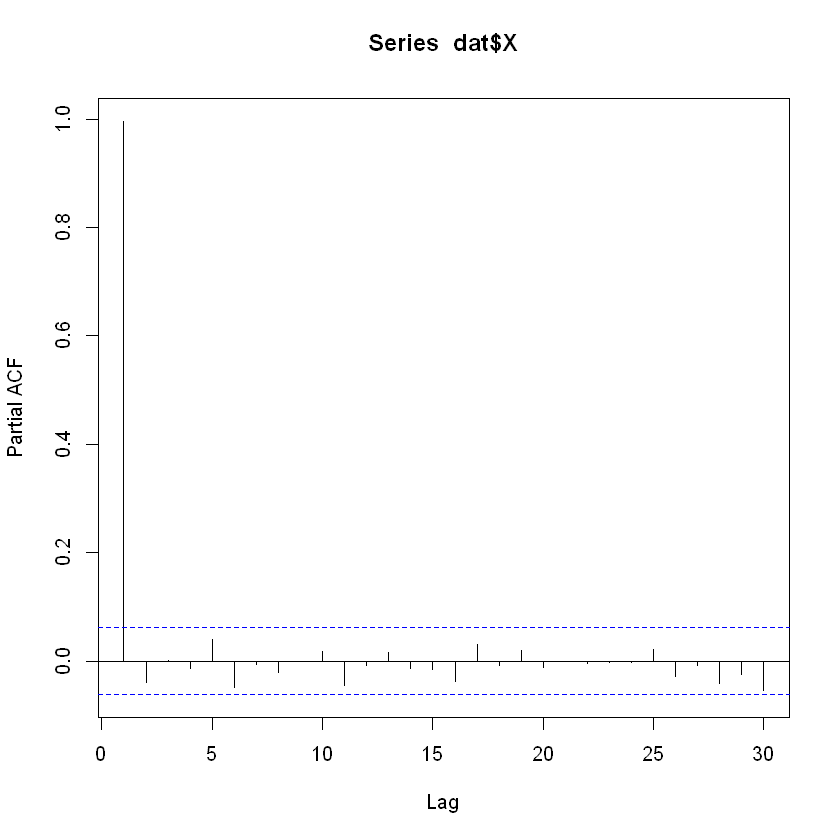

In [5]:
acf(dat$X,type = "partial")

### Stationarity

In [6]:
df <- sim.stationary.example(n=1000)
head(df) ; dim(df)

,t,X1,X2,X3
,<int>,<dbl>,<dbl>,<dbl>
1,1,-0.4780516,0.3258828,-0.3914320
2,2,-1.6682324,1.6044982,-1.8021241
3,3,-1.8553412,2.7538554,0.7137309
4,4,-0.2697390,5.6501048,1.3219370
5,5,-0.4318242,5.5328104,-0.5270710
6,6,0.2874310,5.5229030,-0.2758167


[1] 1000    4

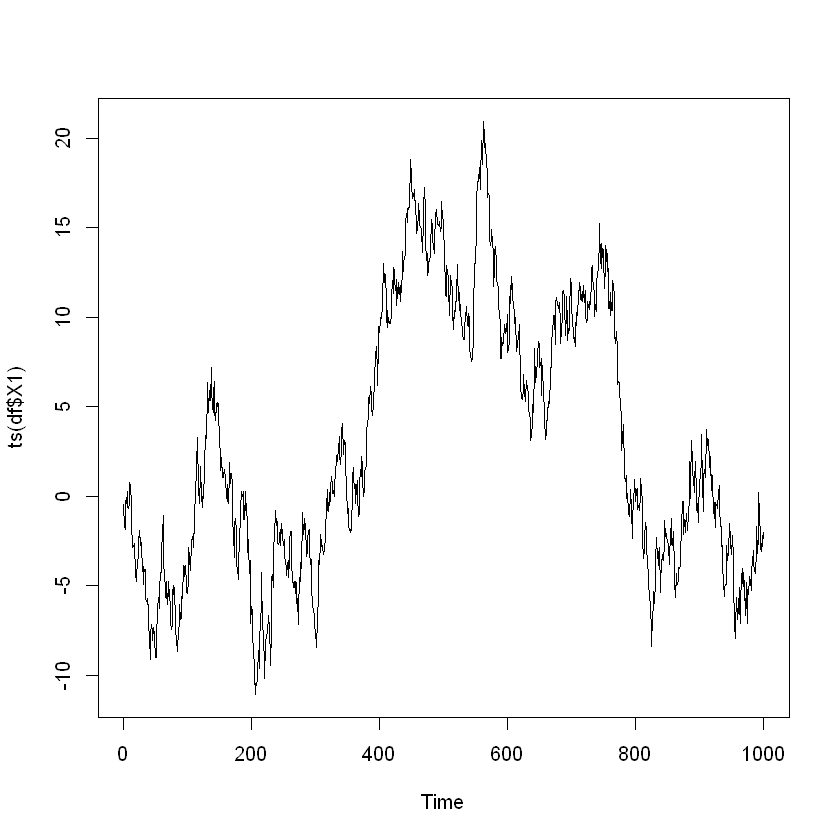

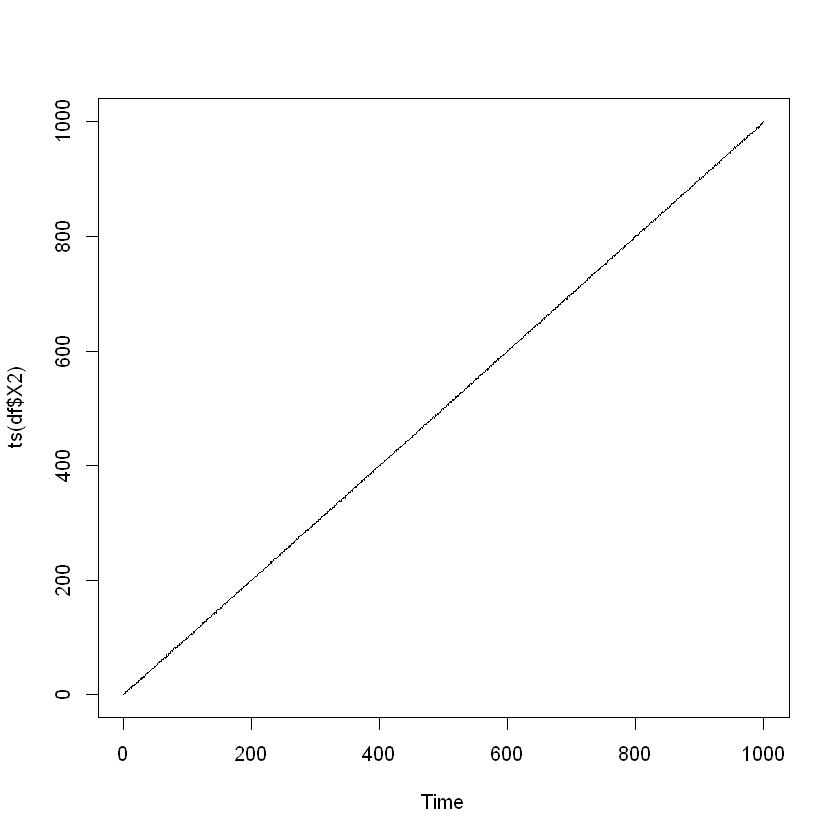

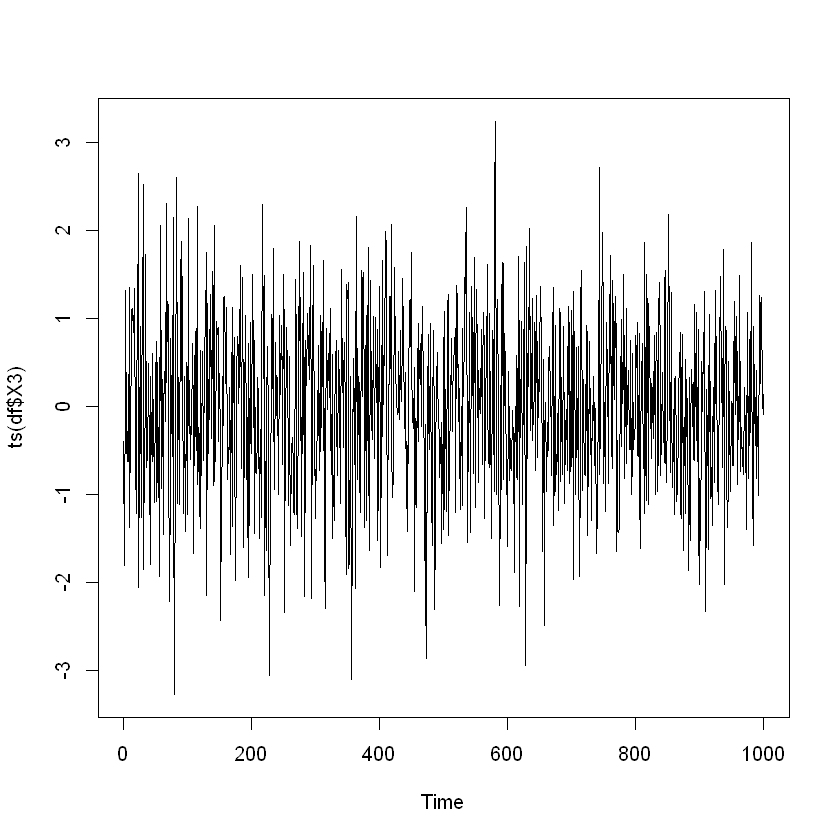

In [7]:
plot(ts(df$X1))
plot(ts(df$X2))
plot(ts(df$X3))


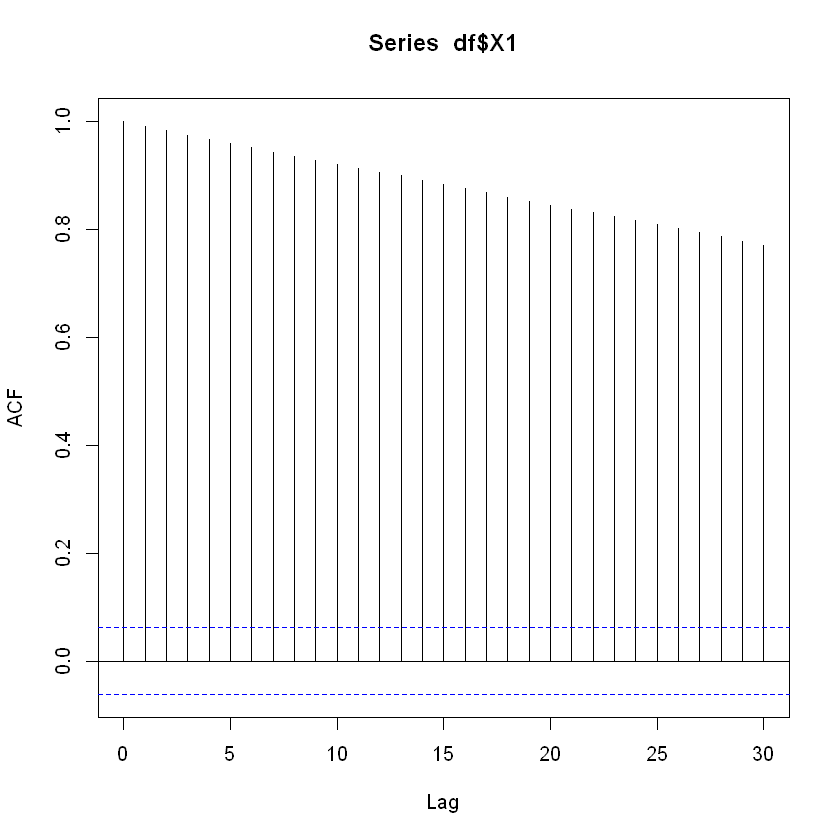

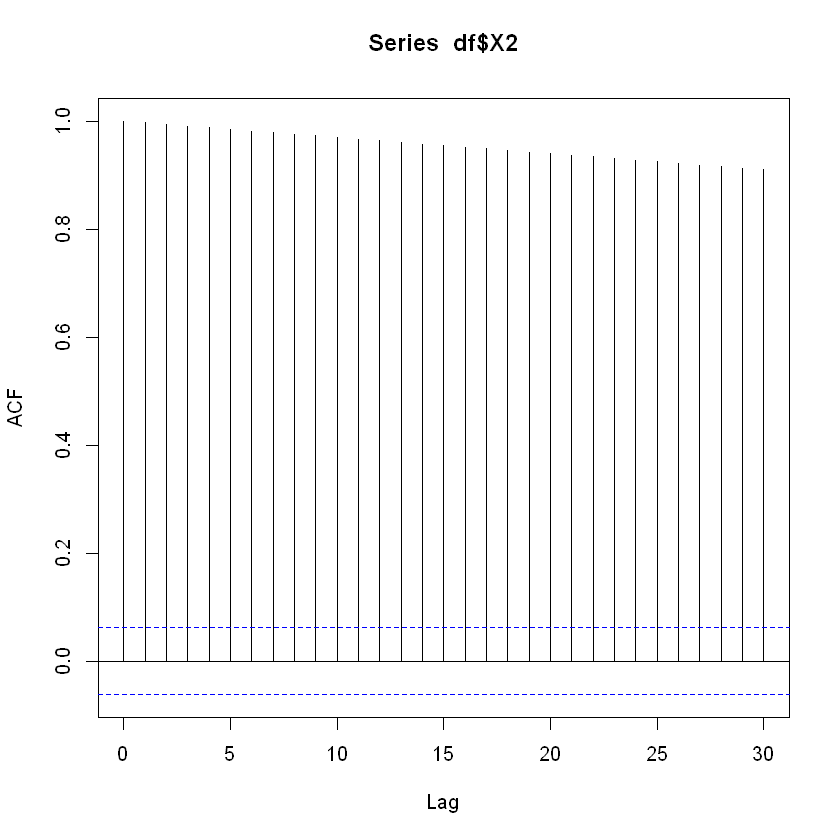

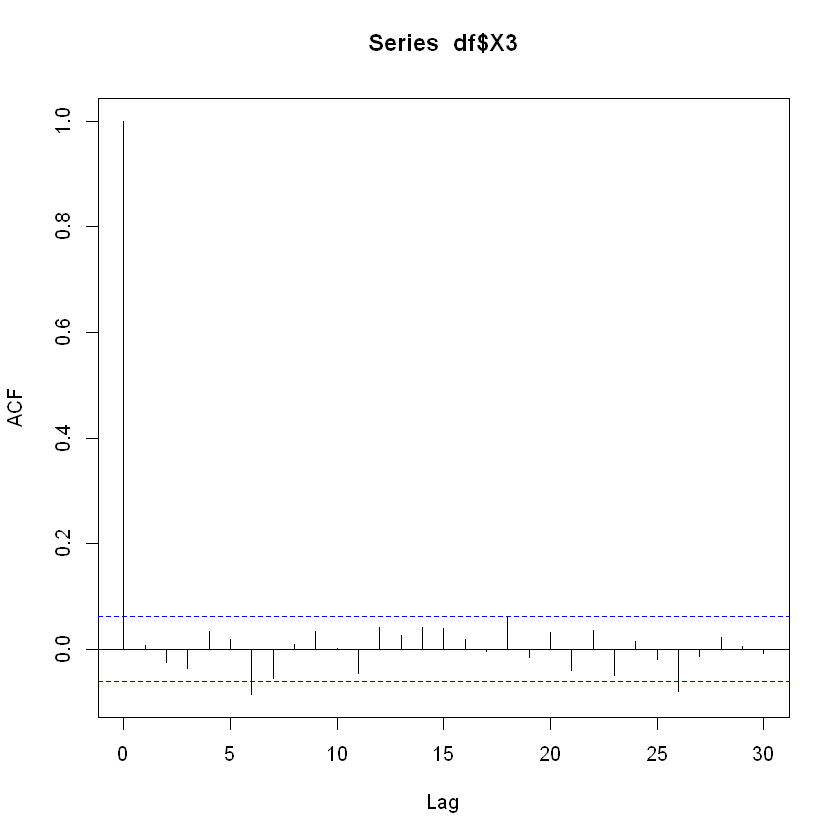

In [8]:
acf(df$X1)
acf(df$X2)
acf(df$X3)

### Differencing

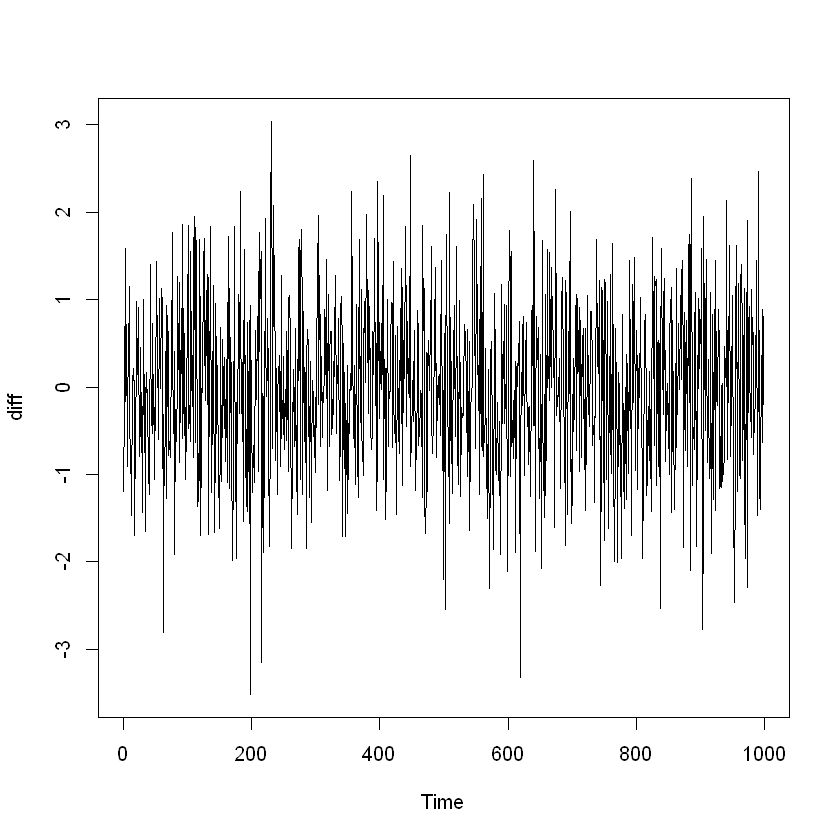

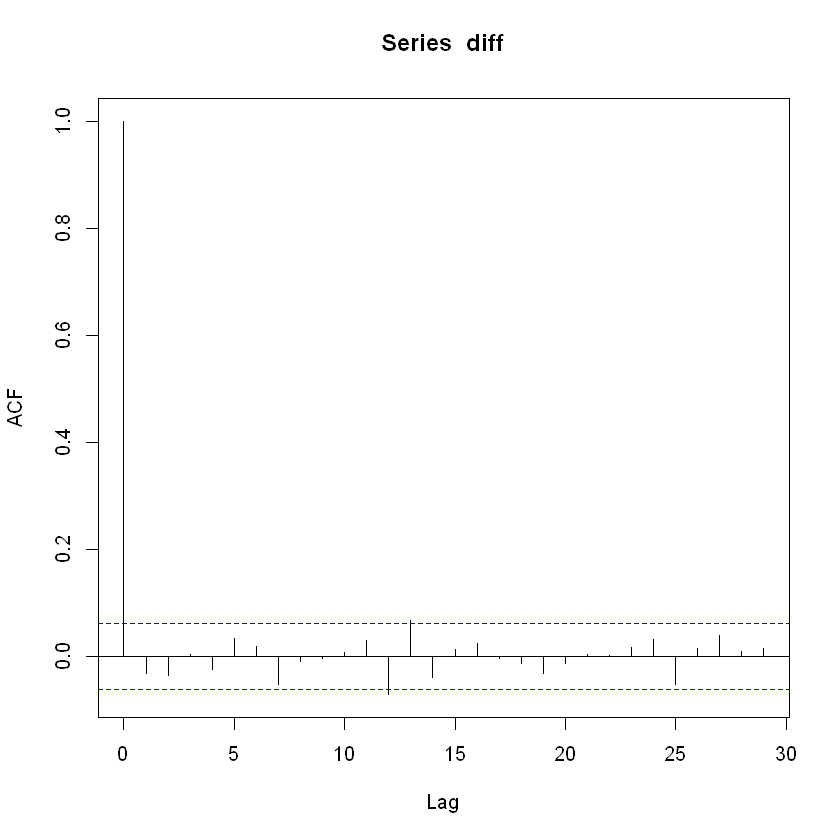

In [9]:
diff <- ts(diff(df$X1))
plot(diff)
acf(diff)


### Detrending

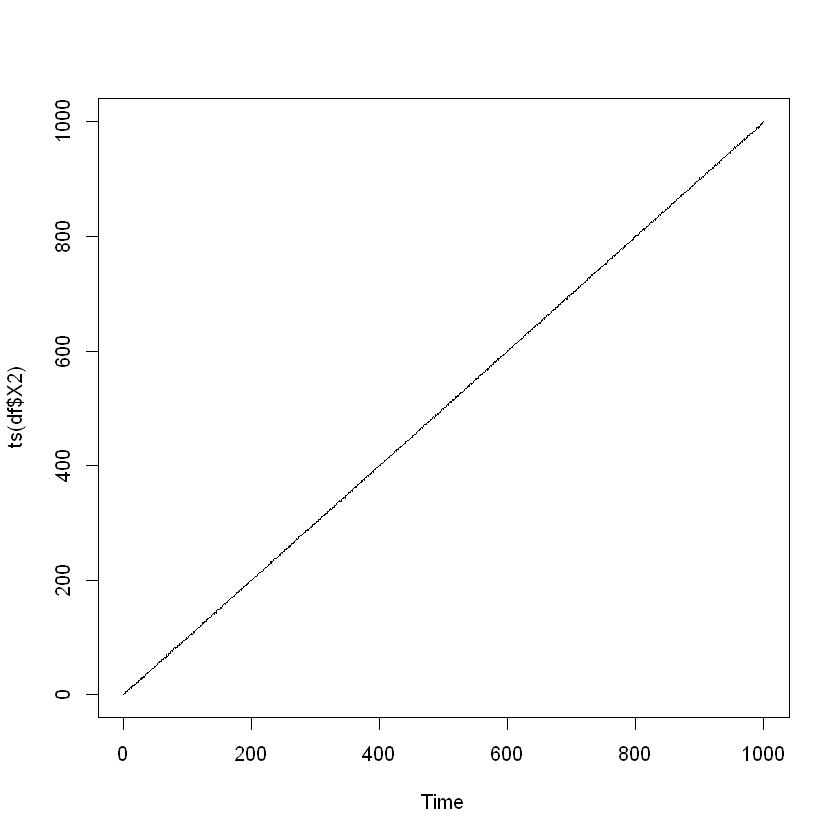

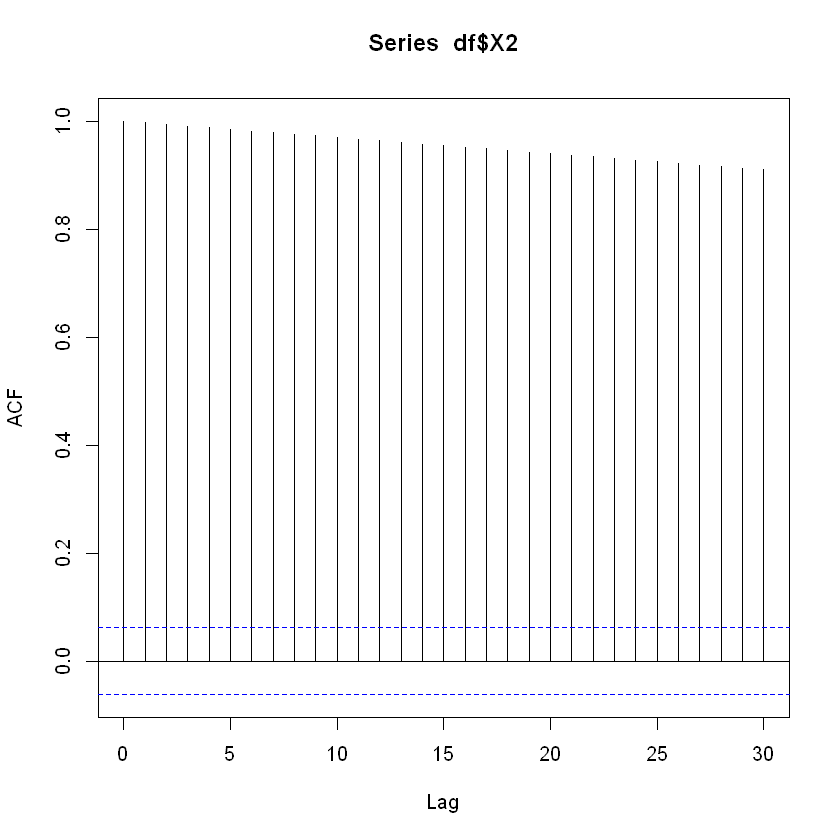

In [10]:
plot(ts(df$X2))
plot(acf(df$X2))

In [11]:
detrended <- resid(lm(X2 ~ t, data = df))

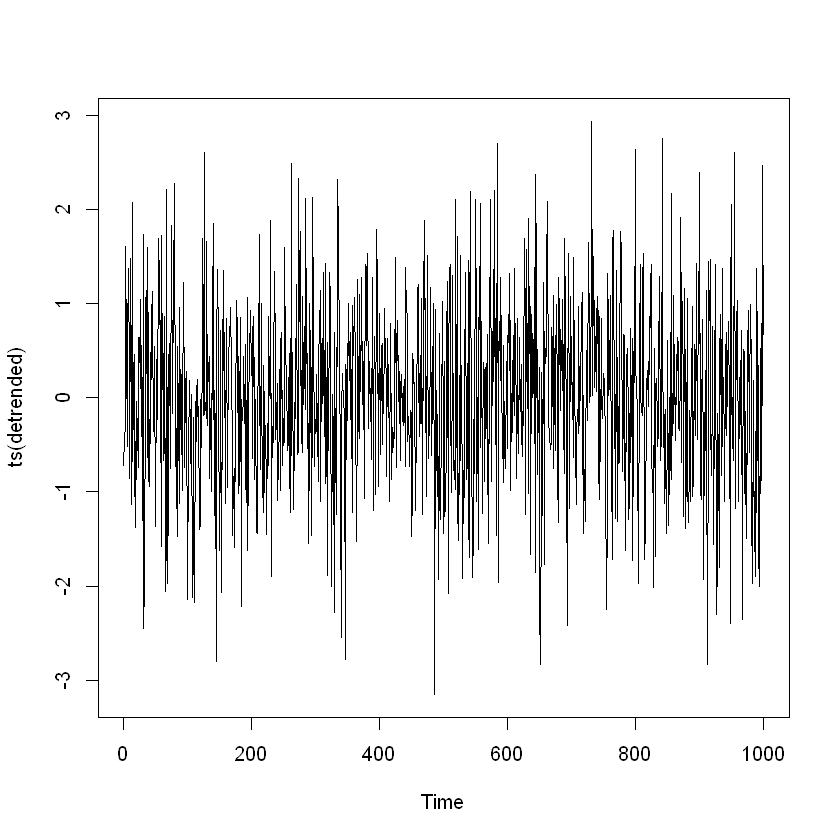

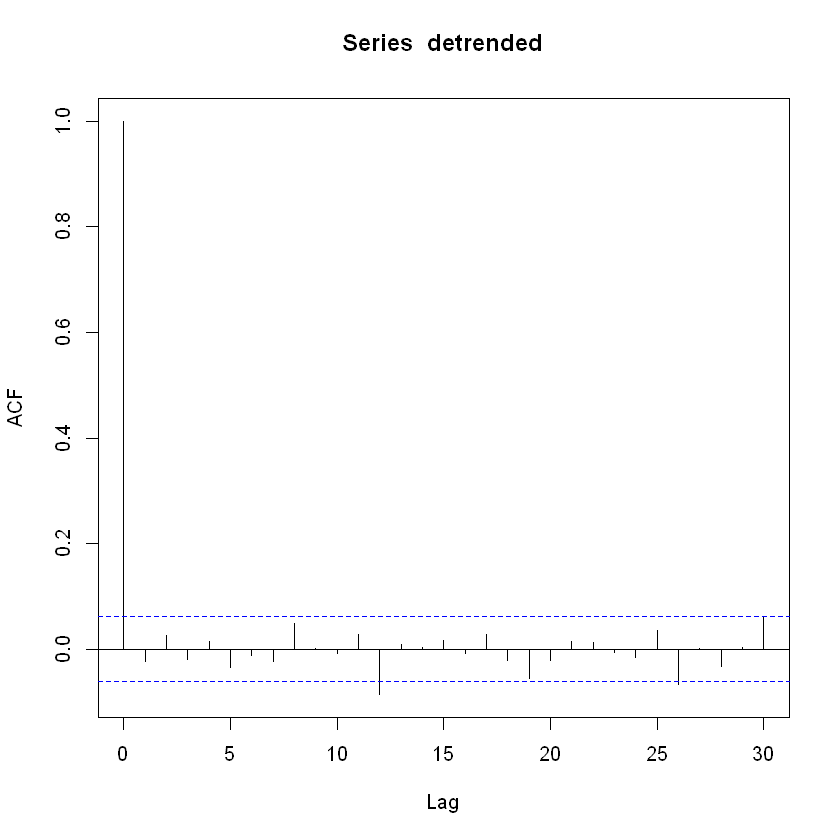

In [12]:
plot(ts(detrended))
acf(detrended)

### Loading Data

In [15]:
df <- read.csv("Mass Monthly Unemployment Rate.csv")
head(df)

,DATE,MAURN
,<chr>,<dbl>
1,1976-01-01,11.6
2,1976-02-01,11.3
3,1976-03-01,10.9
4,1976-04-01,9.9
5,1976-05-01,9.4
6,1976-06-01,9.8


In [19]:
class(df$DATE)

[1] "character"

In [20]:
df$DATE <- as.Date(df$DATE)

In [21]:
head(df)

,DATE,MAURN
,<date>,<dbl>
1,1976-01-01,11.6
2,1976-02-01,11.3
3,1976-03-01,10.9
4,1976-04-01,9.9
5,1976-05-01,9.4
6,1976-06-01,9.8


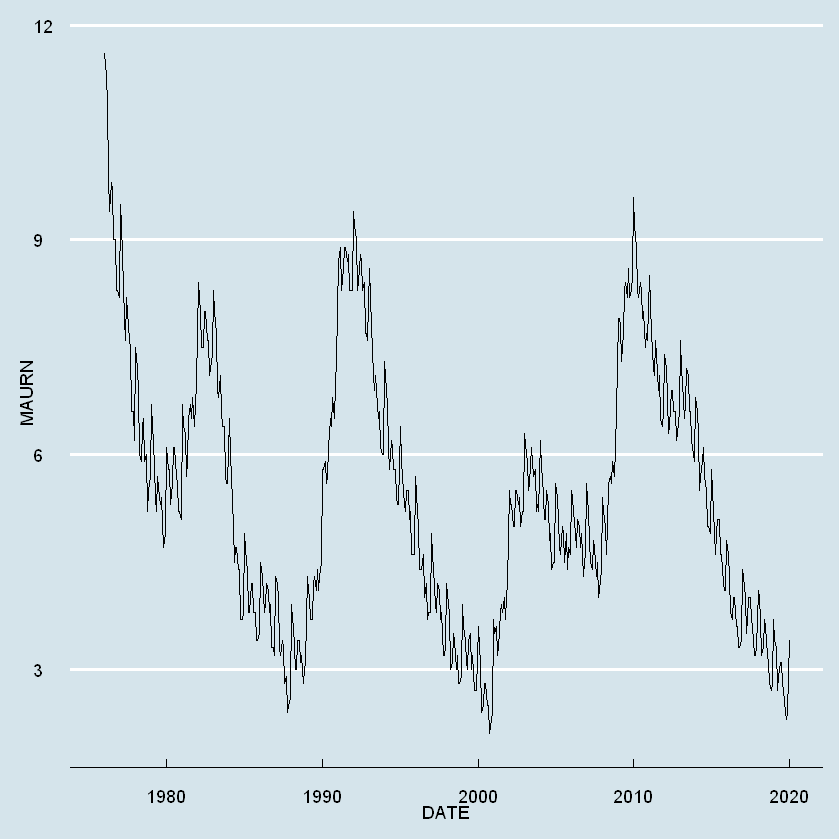

In [25]:
ggplot(df, aes(x = DATE, y = MAURN)) + geom_line()

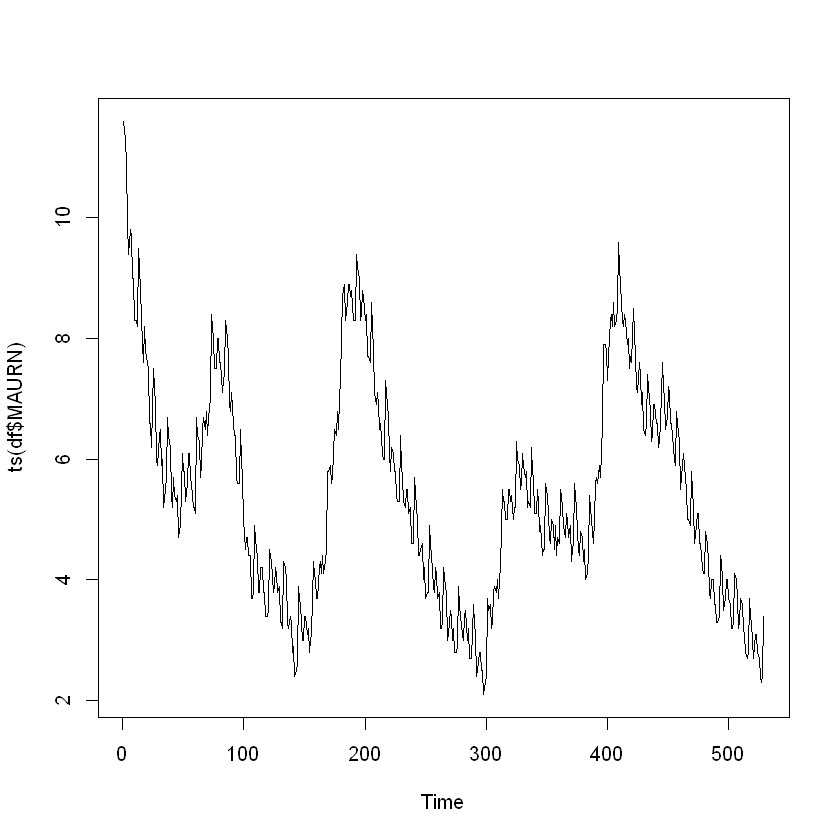

In [23]:
plot(ts(df$MAURN))

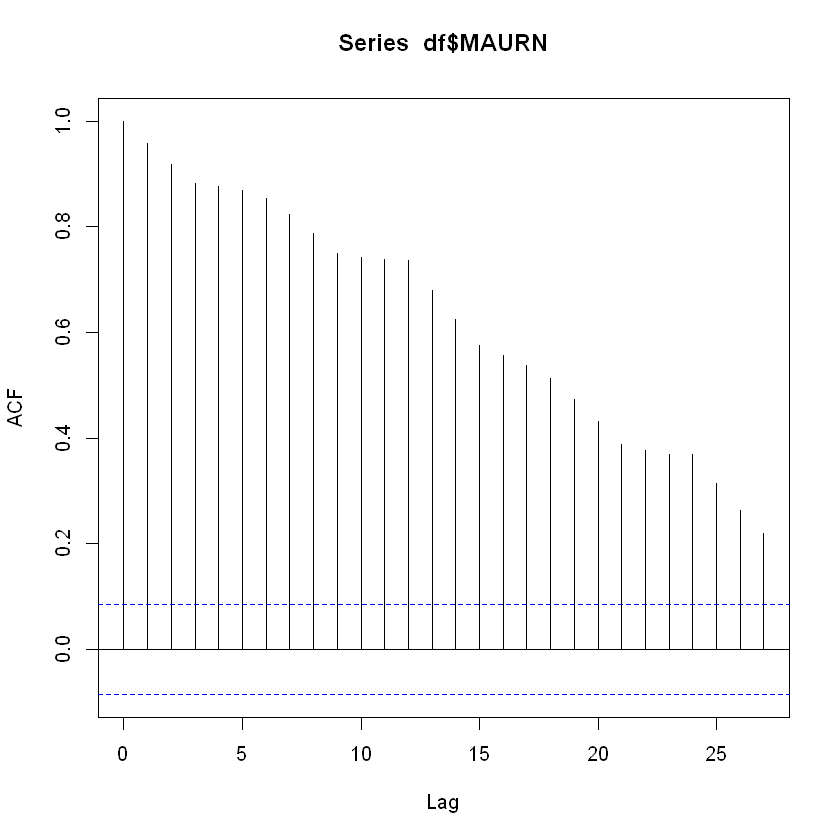

In [27]:
acf(df$MAURN)

### Fitting Models(Transforming for Stationary & Identifying Model Parameters)

In [29]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [33]:
# Fit AR model
ar.model <- auto.arima(df$MAURN, max.d = 0, max.q = 0, allowdrift = TRUE)
ar.model

Series: df$MAURN 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1    mean
      0.9787  5.7425
s.e.  0.0101  0.8498

sigma^2 = 0.2:  log likelihood = -325.44
AIC=656.88   AICc=656.93   BIC=669.7

In [34]:
# MA model
ma.model <- auto.arima(df$MAURN, max.d = 0, max.p = 0, allowdrift = TRUE)
ma.model

Series: df$MAURN 
ARIMA(0,0,5) with non-zero mean 

Coefficients:
         ma1     ma2     ma3     ma4     ma5    mean
      1.3646  1.7103  1.4882  1.2714  0.4804  5.4588
s.e.  0.0368  0.0492  0.0578  0.0393  0.0350  0.1507

sigma^2 = 0.229:  log likelihood = -361.03
AIC=736.05   AICc=736.27   BIC=765.95

In [35]:
# ARMA model
arma.model <- auto.arima(df$MAURN, max.d = 0,  allowdrift = TRUE)
arma.model

Series: df$MAURN 
ARIMA(3,0,2) with non-zero mean 

Coefficients:
          ar1     ar2     ar3     ma1     ma2    mean
      -0.2267  0.5998  0.5573  1.3361  0.8876  5.7038
s.e.   0.0885  0.0544  0.0569  0.0544  0.0221  0.7764

sigma^2 = 0.1693:  log likelihood = -280.15
AIC=574.3   AICc=574.51   BIC=604.19

In [36]:
# ARIMA model
arima.model <- auto.arima(df$MAURN, allowdrift = TRUE)
arima.model

Series: df$MAURN 
ARIMA(4,1,2) 

Coefficients:
         ar1      ar2      ar3     ar4      ma1     ma2
      1.0029  -0.1834  -0.3982  0.4872  -1.1149  0.2512
s.e.  0.0708   0.0750   0.0560  0.0394   0.0793  0.0711

sigma^2 = 0.1509:  log likelihood = -247.45
AIC=508.9   AICc=509.12   BIC=538.78

### Check The Resisduals of the Model Fit

In [38]:
# Calculate residuals of each model
ar.residual <- resid(ar.model)
ma.residual <- resid(ma.model)
arma.residual <- resid(arma.model)
arima.residual <- resid(arima.model)

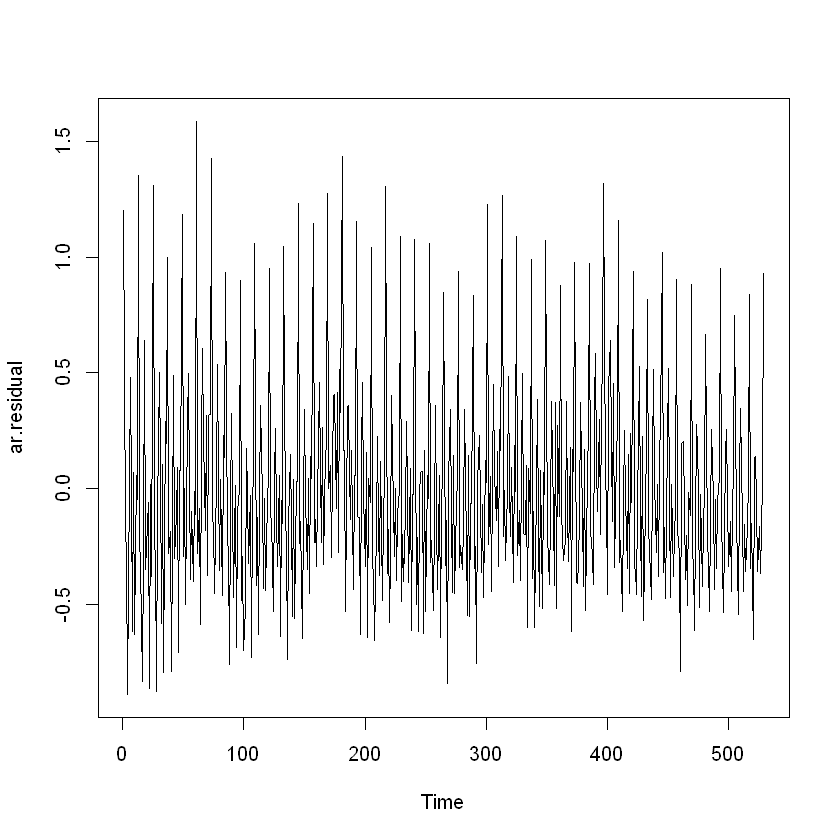

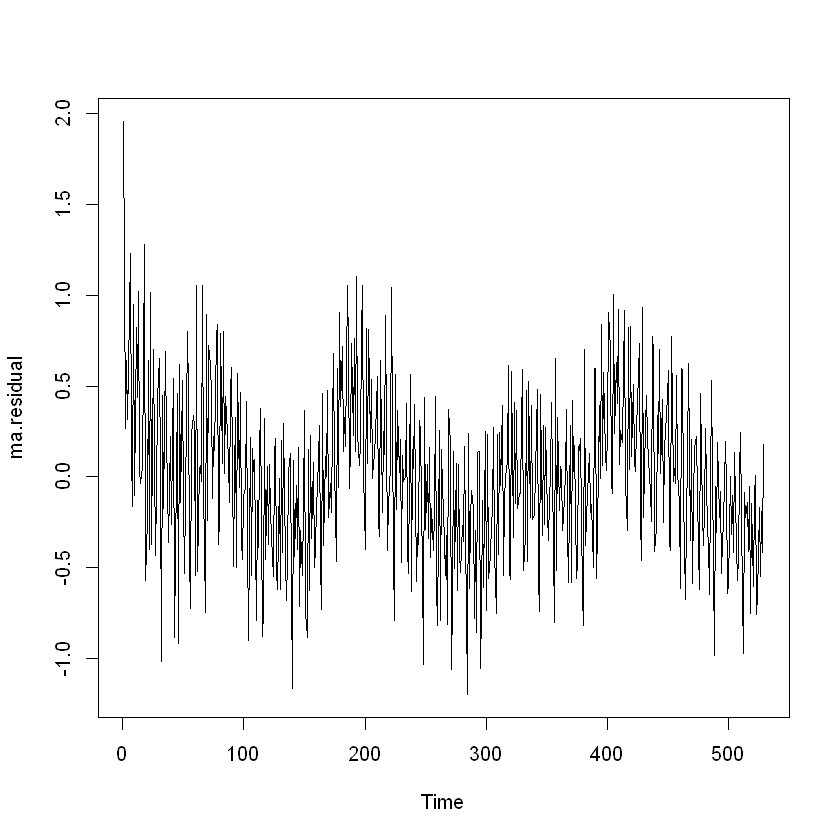

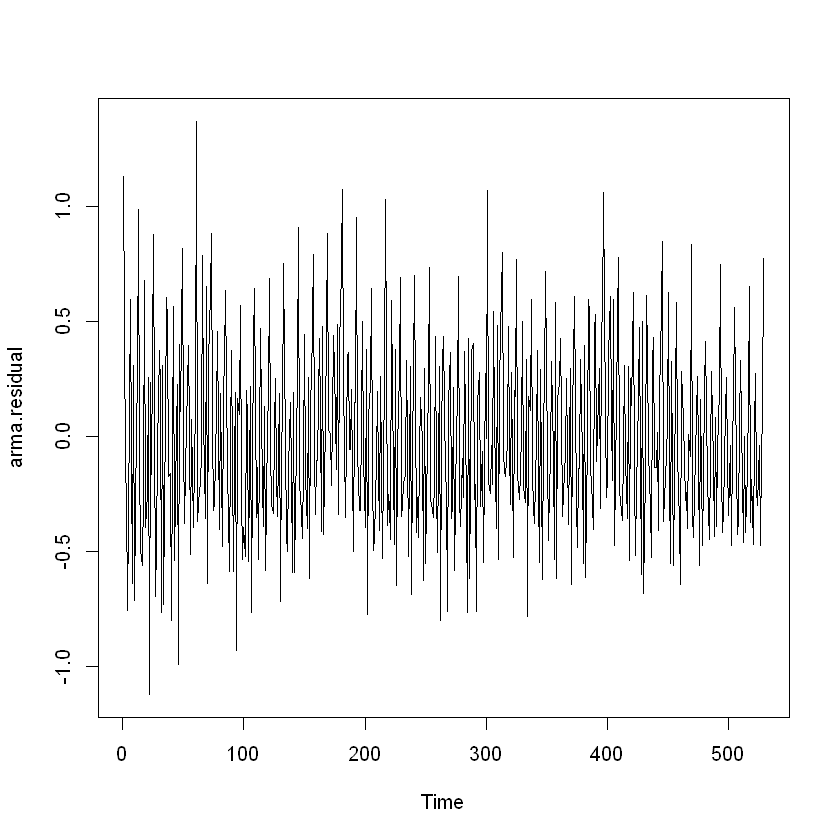

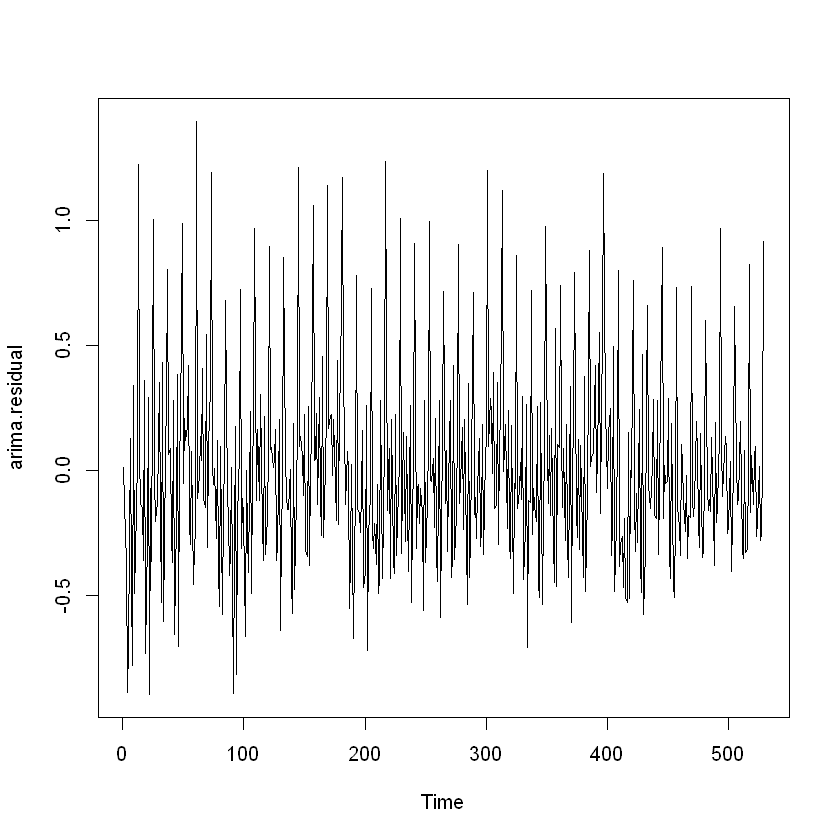

In [41]:
plot(ar.residual)
plot(ma.residual)
plot(arma.residual)
plot(arima.residual)

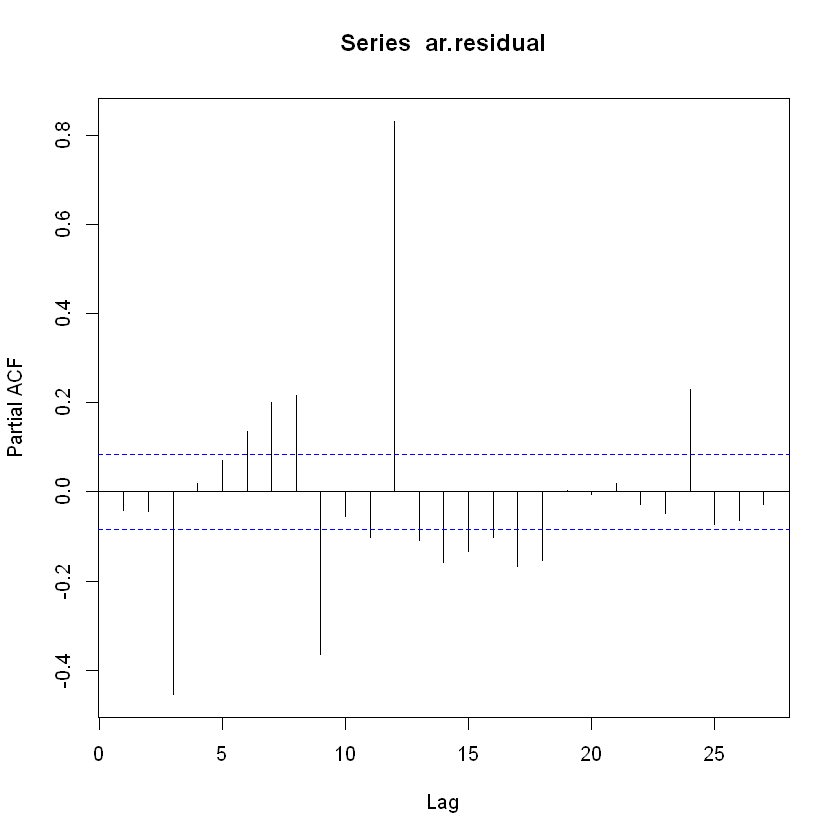

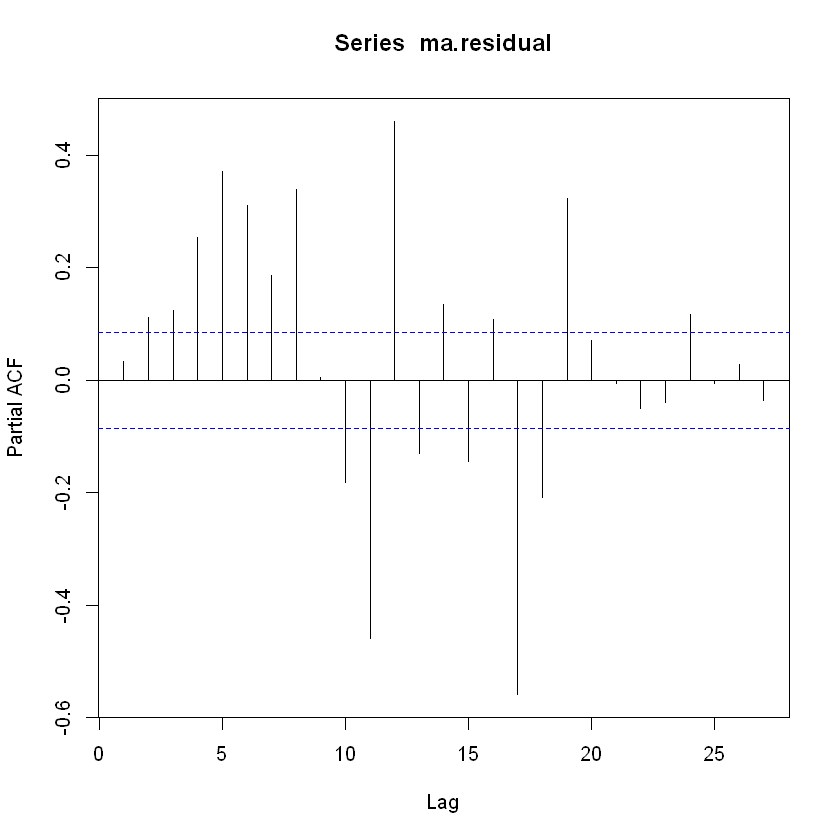

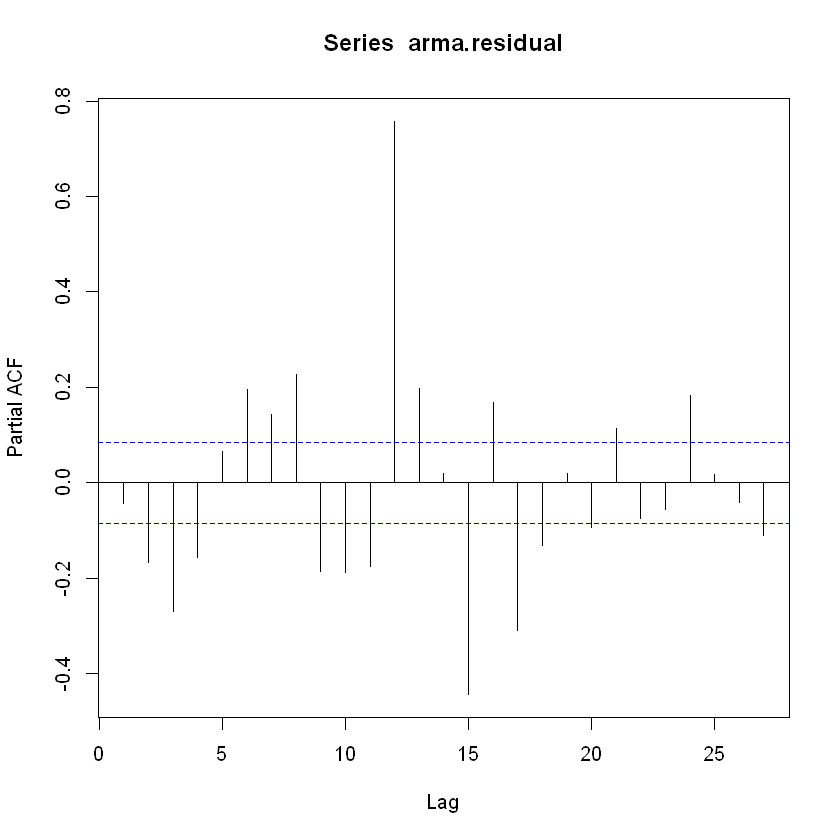

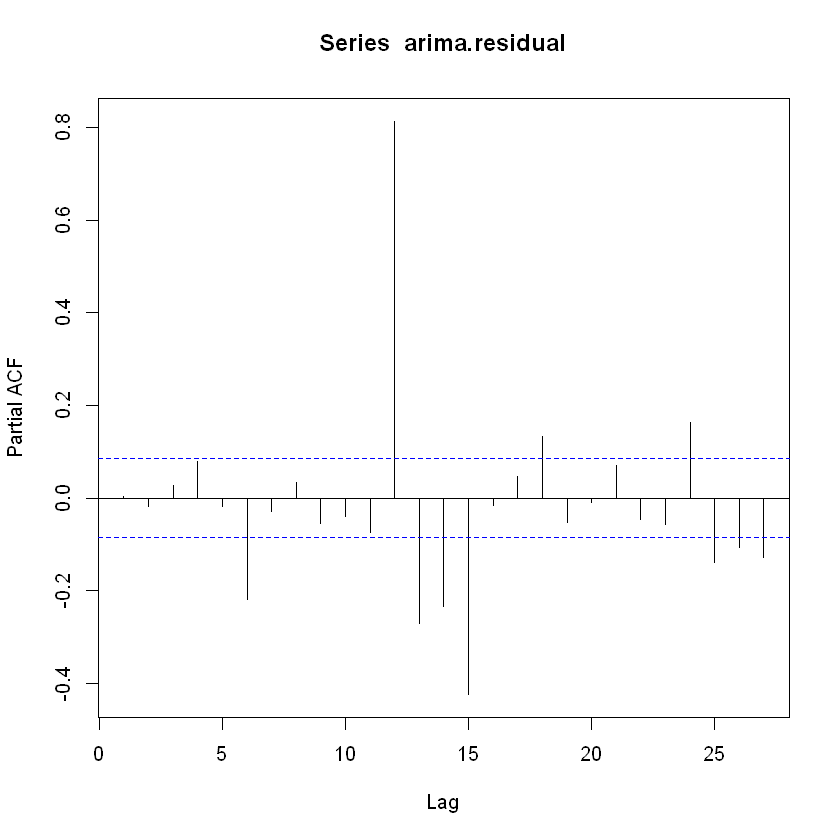

In [42]:
# plot PACF 
pacf(ar.residual)
pacf(ma.residual)
pacf(arma.residual)
pacf(arima.residual)

Generally we are expecting autocorrelation at the first few lags in confidence interval

In [45]:
# Run Ljung Box Test
Box.test(ar.residual,type = "Ljung-Box", lag = 1)
Box.test(ma.residual,type = "Ljung-Box", lag = 1)
Box.test(arma.residual,type = "Ljung-Box", lag = 1)
Box.test(arima.residual,type = "Ljung-Box", lag = 1)



	Box-Ljung test

data:  ar.residual
X-squared = 0.88802, df = 1, p-value = 0.346



	Box-Ljung test

data:  ma.residual
X-squared = 0.56386, df = 1, p-value = 0.4527



	Box-Ljung test

data:  arma.residual
X-squared = 0.96747, df = 1, p-value = 0.3253



	Box-Ljung test

data:  arima.residual
X-squared = 0.0032696, df = 1, p-value = 0.9544


In [46]:
### Making a forecast for each model
ar.forecast <- forecast(ar.model,h = 24, level = 80)
ma.forecast <- forecast(ma.model,h = 24, level = 80)
arma.forecast <- forecast(arma.model,h = 24, level = 80)
arima.forecast <- forecast(arima.model,h = 24, level = 80)

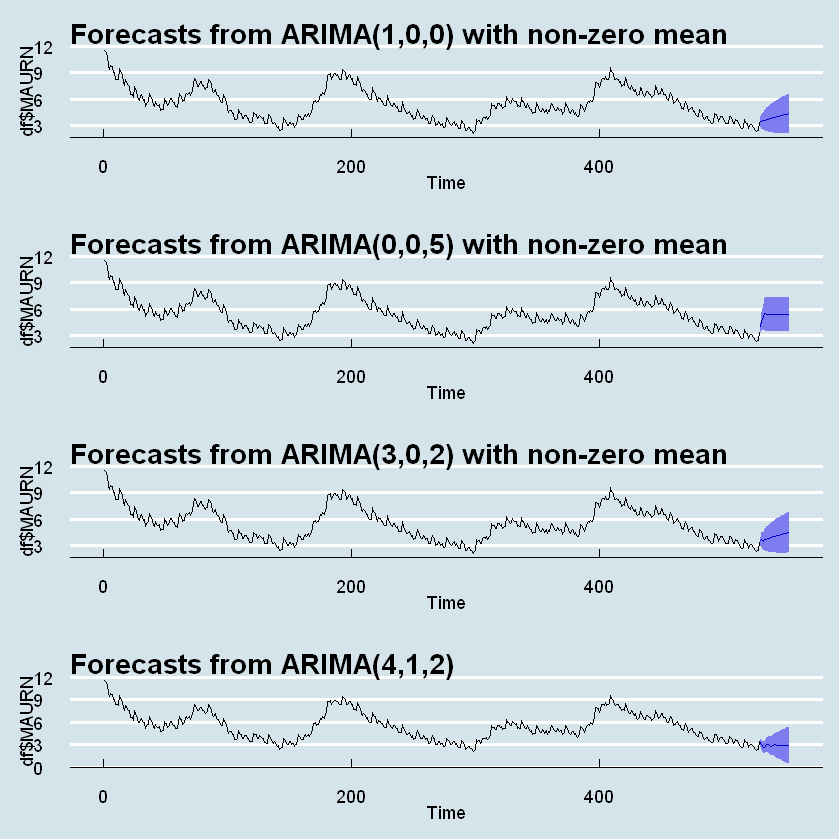

In [60]:
g1 <- autoplot(ar.forecast)
g2 <- autoplot(ma.forecast)
g3 <- autoplot(arma.forecast)
g4 <- autoplot(arima.forecast)

grid.arrange(g1,g2,g3,g4, nrow = 4, ncol =1)


### Fitting Seasonal Trend Loess (STL) Decomposition Models

In [61]:
# Transform to time series object; need to specify frequency

df.ts <-ts(df$MAURN, frequency = 12)

In [65]:
# fit stl model
stl.model <-stl(df.ts, s.window = "periodic")
stl.model

 Call:
 stl(x = df.ts, s.window = "periodic")

Components
          seasonal     trend     remainder
Jan  1  0.74477180 10.748465  1.067627e-01
Feb  1  0.50413417 10.545432  2.504338e-01
Mar  1  0.32481073 10.342398  2.327908e-01
Apr  1 -0.22325989 10.145686 -2.242641e-02
May  1 -0.20087608  9.948974 -3.480981e-01
Jun  1  0.20054259  9.756682 -1.572243e-01
Jul  1  0.17241583  9.564389 -3.680511e-02
Aug  1 -0.15990287  9.374141 -2.142383e-01
Sep  1 -0.05131239  9.183893 -1.325806e-01
Oct  1 -0.52495659  9.017889 -1.929327e-01
Nov  1 -0.43269167  8.851886 -1.191940e-01
Dec  1 -0.35367561  8.711877 -1.582010e-01
Jan  2  0.74477180  8.571867  1.833607e-01
Feb  2  0.50413417  8.439371  2.564945e-01
Mar  2  0.32481073  8.306875  1.683141e-01
Apr  2 -0.22325989  8.167854 -4.459461e-02
May  2 -0.20087608  8.028834 -2.279578e-01
Jun  2  0.20054259  7.869876  1.295811e-01
Jul  2  0.17241583  7.710919 -8.333469e-02
Aug  2 -0.15990287  7.546451  2.134515e-01
Sep  2 -0.05131239  7.381984  1.693284e

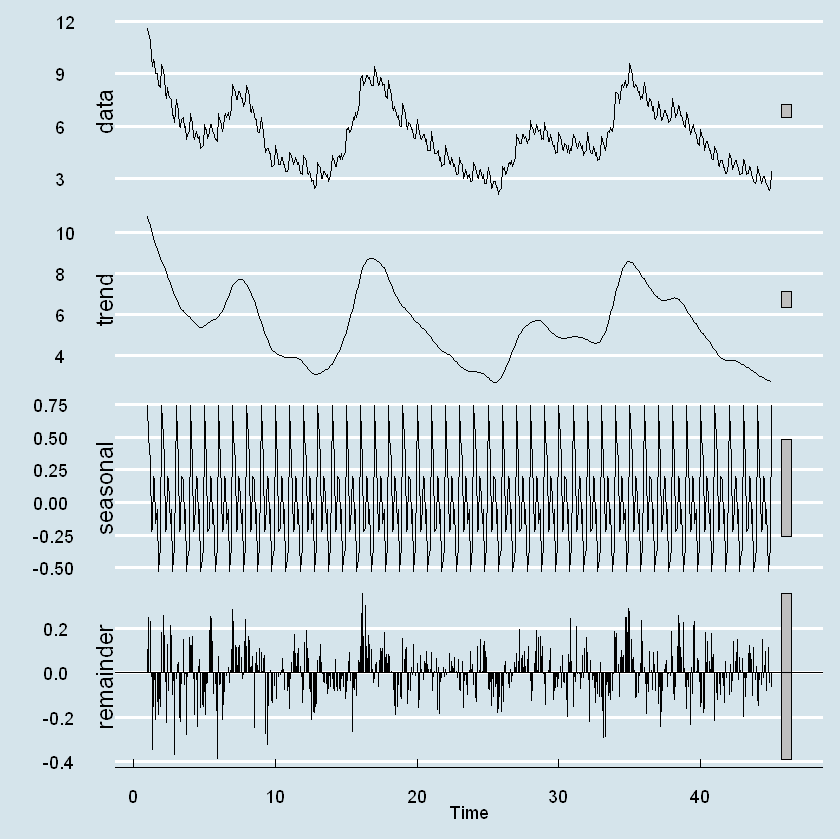

In [66]:
#plot model fit
autoplot(stl.model)

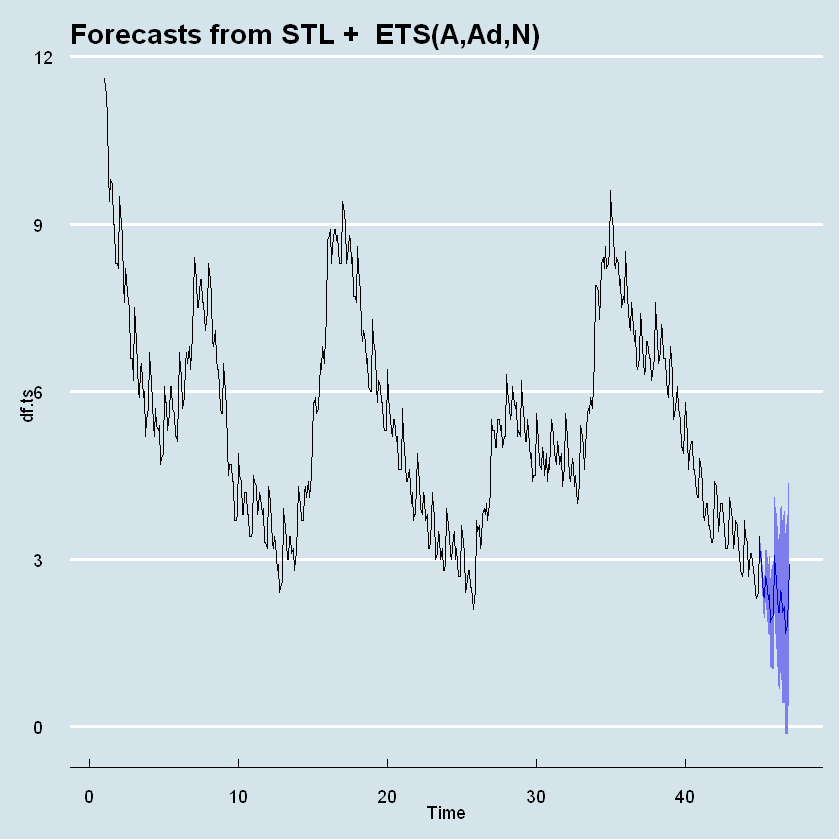

In [68]:
# make forecast
stl.forecast <- forecast(stl.model, h = 24, level = 80)

autoplot(stl.forecast)